In [ ]:
#IMPORT INDEPENDENCIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#LOAD DIGITS DATA FROM SKLEARN
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
digits

In [ ]:
#ASSIGN INDEPENDENT VARIABLES 
X= pd.DataFrame(data= digits.data, columns = digits.feature_names)

In [ ]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
#SET TARGET VARIABLE
y =  pd.DataFrame(data= digits.target)

In [ ]:
#SPLIT DATA INTO TRAIN AND TEST SUBSETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

In [ ]:
#LOAD THE MODEL AND USING GRIDSEARCHCV FOR BEST HYPER-PARAMETERS
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, ],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'metric': ['euclidean', 'minkowski', 'cosine']
}


grid_search = GridSearchCV(estimator=model, param_grid= parameters, cv=5)



In [ ]:
#TRAIN THE MODEL
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)


{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3}


In [ ]:
#CHECKING THE MODEL'S ACCURACY
y_pred = grid_search.predict(X_test)
grid_search.score(X_test, y_test)

0.9866666666666667

In [ ]:
#FOR BETTER UNDERSTANDING OF RESULT CHECK CONFUSION MATRIX AND CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  1  1  1  0  0  1 44]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        38
           3       0.98      1.00      0.99        46
           4       0.98      1.00      0.99        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.97      0.97        38
           9       0.98      0.92      0.95        48

    accuracy                           0.99       450
   macro avg      

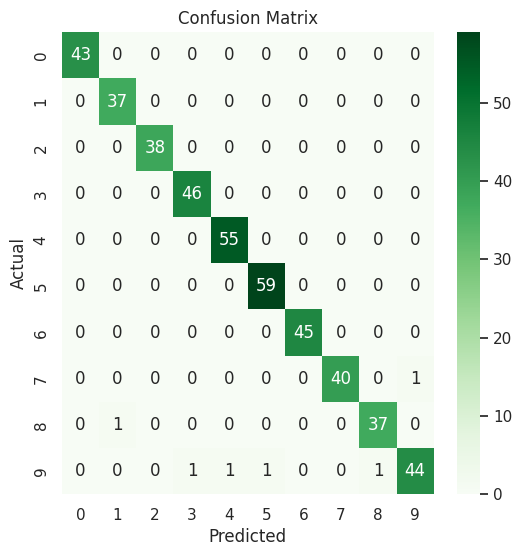

In [ ]:
#PLOTTING GRAPGH FOR CONFUSION MATRIX
import seaborn as sns
sns.set()
cm = confusion_matrix(y_test, y_pred)

# Define the plot size
plt.figure(figsize=(6,6))

# Create the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


# Show the plot
plt.show()